In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

qiskit_runtime_service.__init__:INFO:2024-02-21 14:38:54,755: Default instance: ibm-q/open/main


In [11]:
# init a circuit with two inputs

qc = QuantumCircuit(2)
qc.qubits

[Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)]

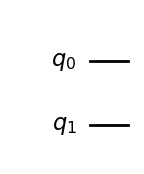

In [4]:
qc.draw('mpl')

In [12]:
# adding a X gate to the qubit 0
# qc = circuit 
# .x = x gate
# (0) = qubit 0

qc.x(0)

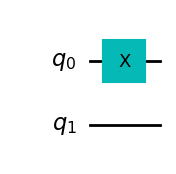

In [13]:
qc.draw("mpl")

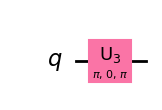

In [14]:
qc.data[0].operation.definition.draw("mpl")

/opt/conda/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


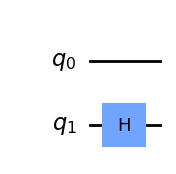

In [15]:
from qiskit.circuit.library import HGate
# reseting the circuit from before 

# 1 = num of 'inputs'
qc = QuantumCircuit(2)
qc.append(
    HGate(), # new hgate
    [1]      # to qubit 1
)

qc.draw('mpl')

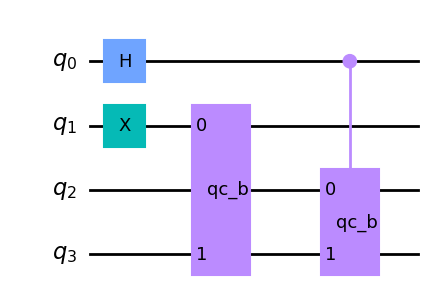

In [29]:
# quantum circuit combination 

qc_a = QuantumCircuit(4, name="qc_a")
qc_a.x(1)
qc_a.append(
    HGate(), # new hgate
    [0]      # to qubit 1
)

qc_b = QuantumCircuit(2, name="qc_b")
qc_b.y(0)
qc_b.z(1)

# adding q0 from qc_b to qc_a q0 mapped to the position q1 and q1 mappend to q3
# combined = qc_a.compose(qc_b, qubits=[1, 3])
# combined.draw("mpl")

inst = qc_b.to_instruction()
qc_a.append(inst, [1, 3])


gate = qc_b.to_gate().control()
qc_a.append(gate, [0, 2, 3])
qc_a.draw("mpl")

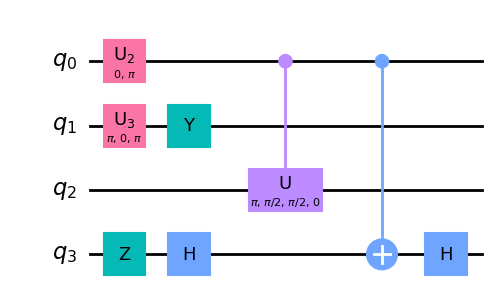

In [30]:
qc_a.decompose().draw("mpl")